In [1]:
import numpy as np
import time
import pickle
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm  # Status bar

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 1. Traditional ML Approach: SVM

# Flatten images into 1D vectors for SVM
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM classifier with progress bar
svm_model = SVC(kernel='rbf', random_state=42, max_iter=1000)

print("Training SVM model...")
start_time = time.time()
for i in tqdm(range(1), desc="SVM Progress"):
    svm_model.fit(X_train_pca, y_train.ravel())
training_time_svm = time.time() - start_time

# Save SVM model, PCA, and scaler
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("pca_scaler.pkl", "wb") as f:
    pickle.dump(pca, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print(f"SVM model, PCA, and scaler saved in {training_time_svm:.2f} seconds.\n")

# 2. Deep Learning Approach: CNN

# Normalize the data for CNN
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode the labels for CNN
y_train_cnn = to_categorical(y_train, 10)
y_test_cnn = to_categorical(y_test, 10)

# Build a simple CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model with progress bar
print("Training CNN model...")
start_time = time.time()

# Use tqdm for progress bar and Keras callback
class TQDMProgressCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        tqdm.write(f"Epoch {epoch+1} - loss: {logs['loss']:.4f} - accuracy: {logs['accuracy']:.4f} - val_loss: {logs['val_loss']:.4f} - val_accuracy: {logs['val_accuracy']:.4f}")

with tqdm(total=10, desc="CNN Progress") as pbar:
    history = cnn_model.fit(
        X_train, y_train_cnn,
        epochs=10,
        batch_size=64,
        validation_data=(X_test, y_test_cnn),
        callbacks=[TQDMProgressCallback()]
    )
training_time_cnn = time.time() - start_time

# Save the CNN model
cnn_model.save('cnn_model.h5')

print(f"CNN model saved in {training_time_cnn:.2f} seconds.\n")


Training SVM model...


SVM Progress:   0%|          | 0/1 [00:00<?, ?it/s]/opt/miniconda3/envs/aienv/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
SVM Progress: 100%|██████████| 1/1 [01:42<00:00, 102.06s/it]


SVM model, PCA, and scaler saved in 102.09 seconds.



/opt/miniconda3/envs/aienv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN model...


CNN Progress:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3230 - loss: 1.8275

CNN Progress:   0%|          | 0/10 [00:12<?, ?it/s]

Epoch 1 - loss: 1.5912 - accuracy: 0.4192 - val_loss: 1.2932 - val_accuracy: 0.5402
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.3233 - loss: 1.8269 - val_accuracy: 0.5402 - val_loss: 1.2932
Epoch 2/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5554 - loss: 1.2511

CNN Progress:   0%|          | 0/10 [00:23<?, ?it/s]

Epoch 2 - loss: 1.2150 - accuracy: 0.5690 - val_loss: 1.1330 - val_accuracy: 0.5940
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5555 - loss: 1.2510 - val_accuracy: 0.5940 - val_loss: 1.1330
Epoch 3/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6153 - loss: 1.0973

CNN Progress:   0%|          | 0/10 [00:34<?, ?it/s]

Epoch 3 - loss: 1.0705 - accuracy: 0.6245 - val_loss: 1.0259 - val_accuracy: 0.6411
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6153 - loss: 1.0973 - val_accuracy: 0.6411 - val_loss: 1.0259
Epoch 4/10
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6550 - loss: 0.9860

CNN Progress:   0%|          | 0/10 [00:45<?, ?it/s]

Epoch 4 - loss: 0.9788 - accuracy: 0.6565 - val_loss: 1.0426 - val_accuracy: 0.6355
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6550 - loss: 0.9859 - val_accuracy: 0.6355 - val_loss: 1.0426
Epoch 5/10
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6791 - loss: 0.9187

CNN Progress:   0%|          | 0/10 [00:56<?, ?it/s]

Epoch 5 - loss: 0.9071 - accuracy: 0.6829 - val_loss: 0.9826 - val_accuracy: 0.6593
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6791 - loss: 0.9186 - val_accuracy: 0.6593 - val_loss: 0.9826
Epoch 6/10
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6954 - loss: 0.8622

CNN Progress:   0%|          | 0/10 [01:07<?, ?it/s]

Epoch 6 - loss: 0.8567 - accuracy: 0.7001 - val_loss: 0.9222 - val_accuracy: 0.6767
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6955 - loss: 0.8621 - val_accuracy: 0.6767 - val_loss: 0.9222
Epoch 7/10
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7179 - loss: 0.8114

CNN Progress:   0%|          | 0/10 [01:18<?, ?it/s]

Epoch 7 - loss: 0.8077 - accuracy: 0.7189 - val_loss: 0.9081 - val_accuracy: 0.6846
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7179 - loss: 0.8114 - val_accuracy: 0.6846 - val_loss: 0.9081
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7316 - loss: 0.7685

CNN Progress:   0%|          | 0/10 [01:28<?, ?it/s]

Epoch 8 - loss: 0.7633 - accuracy: 0.7351 - val_loss: 0.8414 - val_accuracy: 0.7107
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7317 - loss: 0.7684 - val_accuracy: 0.7107 - val_loss: 0.8414
Epoch 9/10
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7457 - loss: 0.7273

CNN Progress:   0%|          | 0/10 [01:39<?, ?it/s]

Epoch 9 - loss: 0.7277 - accuracy: 0.7463 - val_loss: 0.8751 - val_accuracy: 0.7032
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7457 - loss: 0.7273 - val_accuracy: 0.7032 - val_loss: 0.8751
Epoch 10/10
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7550 - loss: 0.6914

CNN Progress:   0%|          | 0/10 [01:50<?, ?it/s]

Epoch 10 - loss: 0.7003 - accuracy: 0.7533 - val_loss: 0.8553 - val_accuracy: 0.7077
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7550 - loss: 0.6915 - val_accuracy: 0.7077 - val_loss: 0.8553


CNN Progress:   0%|          | 0/10 [01:50<?, ?it/s]


CNN model saved in 110.30 seconds.



In [2]:
import numpy as np
import pandas as pd
import time
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tqdm import tqdm

# 1. Loading and Splitting Dataset
# Load dataset
df = pd.read_csv('IMDB Dataset.csv')

# Map sentiment to binary (positive: 1, negative: 0)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split data into training and testing sets
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the split datasets for future use
train_df = pd.DataFrame({'review': X_train, 'sentiment': y_train})
test_df = pd.DataFrame({'review': X_test, 'sentiment': y_test})
train_df.to_csv('train_reviews.csv', index=False)
test_df.to_csv('test_reviews.csv', index=False)

# 2. Traditional ML Approach: Naive Bayes Classifier
# Preprocess text using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Naive Bayes classifier
nb_model = MultinomialNB()

# Train and time the model
start_time = time.time()
nb_model.fit(X_train_tfidf, y_train)
nb_training_time = time.time() - start_time

# Test the model
nb_predictions = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Save the Naive Bayes model and TF-IDF Vectorizer
with open("nb_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print(f"Naive Bayes Model -> Accuracy: {nb_accuracy:.4f}, Training Time: {nb_training_time:.2f} seconds")

# 3. Deep Learning Approach: Recurrent Neural Network (RNN)
# Preprocessing for RNN
max_words = 10000
max_len = 200

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len))
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train and time the model
start_time = time.time()
history = rnn_model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))
rnn_training_time = time.time() - start_time

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_pad, y_test)

# Save the RNN model and Tokenizer
rnn_model.save('rnn_model.h5')
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print(f"RNN Model -> Accuracy: {rnn_accuracy:.4f}, Training Time: {rnn_training_time:.2f} seconds")

# 4. Summary of Results
print("\nComparison of Naive Bayes and RNN:")
print(f"Naive Bayes -> Accuracy: {nb_accuracy:.4f}, Training Time: {nb_training_time:.2f} seconds")
print(f"RNN -> Accuracy: {rnn_accuracy:.4f}, Training Time: {rnn_training_time:.2f} seconds")


Naive Bayes Model -> Accuracy: 0.8517, Training Time: 0.01 seconds
Epoch 1/5


/opt/miniconda3/envs/aienv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6536 - loss: 0.5845 - val_accuracy: 0.7965 - val_loss: 0.4447
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8667 - loss: 0.3229 - val_accuracy: 0.8469 - val_loss: 0.3691
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9093 - loss: 0.2366 - val_accuracy: 0.8617 - val_loss: 0.3489
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9348 - loss: 0.1745 - val_accuracy: 0.8507 - val_loss: 0.3718
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9573 - loss: 0.1242 - val_accuracy: 0.8596 - val_loss: 0.4626
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8641 - loss: 0.4504


RNN Model -> Accuracy: 0.8596, Training Time: 44.02 seconds

Comparison of Naive Bayes and RNN:
Naive Bayes -> Accuracy: 0.8517, Training Time: 0.01 seconds
RNN -> Accuracy: 0.8596, Training Time: 44.02 seconds


Train and test datasets saved to 'train.csv' and 'test.csv'.
ARIMA Model RMSE: 80.6639
Epoch 1/100


/opt/miniconda3/envs/aienv/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/aienv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1783  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1007 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0424 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0185 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0273 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0377 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0276 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0146 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0195 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0151
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 
Epoch 16/100
2/2 ━━━━━━━━━━━━━

LSTM Model RMSE: 97.9029
LSTM Training Time: 2.93 seconds


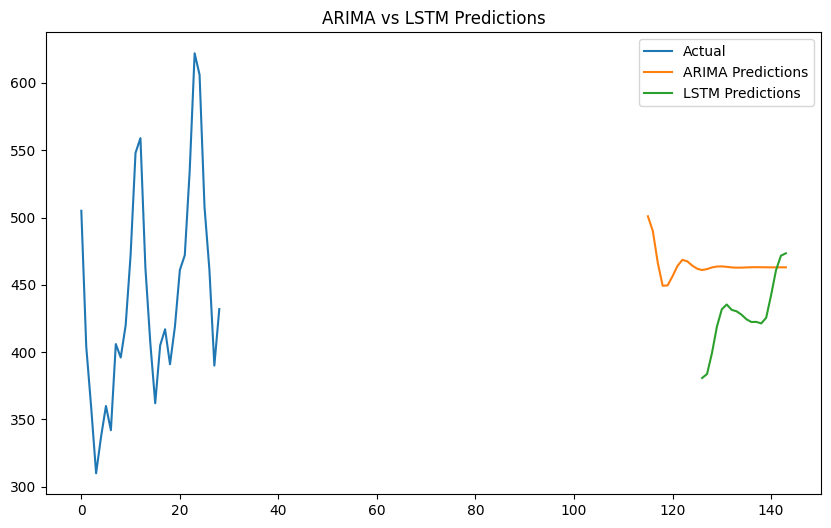

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import pickle
import time

# 1. Load Dataset
df = pd.read_csv('AirPassengers.csv')

# Ensure the dataset is sorted by date
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# 2. Preprocess Data (ARIMA and LSTM)
data = df['#Passengers'].values
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Save the train and test datasets to CSV files
train_df = pd.DataFrame(train, columns=['#Passengers'])
test_df = pd.DataFrame(test, columns=['#Passengers'])

train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)
print("Train and test datasets saved to 'train.csv' and 'test.csv'.")

# 3. Traditional ML Approach: ARIMA Model
def train_arima(train, test):
    # Fit the ARIMA model on training data
    model = ARIMA(train, order=(5, 1, 0))
    arima_model = model.fit()

    # Forecast
    start = len(train)
    end = len(train) + len(test) - 1
    predictions = arima_model.predict(start=start, end=end, typ='levels')

    # RMSE
    rmse = sqrt(mean_squared_error(test, predictions))

    # Save ARIMA model
    with open('arima_model.pkl', 'wb') as f:
        pickle.dump(arima_model, f)

    return predictions, rmse

# 4. Deep Learning Approach: LSTM Model
def train_lstm(train, test):
    # Normalize the data for LSTM
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train.reshape(-1, 1))
    test_scaled = scaler.transform(test.reshape(-1, 1))

    # Prepare the data for LSTM input
    def create_dataset(data, time_step=1):
        X, y = [], []
        for i in range(len(data) - time_step - 1):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)

    time_step = 10  # Define time step (window size)
    X_train, y_train = create_dataset(train_scaled, time_step)
    X_test, y_test = create_dataset(test_scaled, time_step)

    # Reshape input to be [samples, time steps, features] which is required for LSTM
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the LSTM model
    start_time = time.time()
    model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)
    lstm_training_time = time.time() - start_time

    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Inverse transform the predictions back to original scale
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    # Calculate RMSE for test data
    rmse = sqrt(mean_squared_error(test[time_step + 1:], test_predict))

    # Save the LSTM model
    model.save('lstm_model.h5')

    return test_predict, rmse, lstm_training_time, time_step  # Return time_step as well

# 5. Train and Evaluate Models
# ARIMA Model
arima_predictions, arima_rmse = train_arima(train, test)
print(f'ARIMA Model RMSE: {arima_rmse:.4f}')

# LSTM Model
lstm_predictions, lstm_rmse, lstm_training_time, time_step = train_lstm(train, test)
print(f'LSTM Model RMSE: {lstm_rmse:.4f}')
print(f'LSTM Training Time: {lstm_training_time:.2f} seconds')

# Adjust LSTM plotting to account for the time step difference
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')  # Plot the actual test data

# Plot ARIMA predictions starting after the train set
plt.plot(np.arange(len(train), len(train) + len(test)), arima_predictions, label='ARIMA Predictions')

# Plot LSTM predictions, aligning them with test data
# The LSTM predictions start after the 'time_step' offset
plt.plot(np.arange(len(train) + time_step + 1, len(train) + len(test)), lstm_predictions, label='LSTM Predictions')

plt.legend()
plt.title('ARIMA vs LSTM Predictions')
plt.show()
